In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Cargar Datos
df_data_blue= pd.read_csv('../DATA/SIMULADOS21/WW/A8_BP.csv')
df1= df_data_blue[(df_data_blue['wave'] < 1200)]
df_data_red = pd.read_csv('../DATA/SIMULADOS21/WW//A8_RP.csv')
df2 = df_data_red[(df_data_red['wave'] < 1200)]
df = pd.read_csv('../DATA/SIMULADOS21/Convertidos/A8_BP.csv_A8_RP.csv.csv')


In [53]:
# Calcula la diferencia entre las dos columnas en cada dataframe
diff_col1 = np.abs(df1['wave'].values.reshape(-1, 1) - df2['wave'].values)
diff_col2 = np.abs(df1['flux'].values.reshape(-1, 1) - df2['flux'].values)

In [54]:
# Encuentra la posición donde la suma de las diferencias es mínima
min_diff = (diff_col1 + diff_col2).min()
min_idx = np.argwhere((diff_col1 + diff_col2) == min_diff)[0]

# Corta los dataframes originales en la fila con la mínima diferencia
df1_cortado = df1.iloc[min_idx[0]:]
df2_cortado = df2.iloc[min_idx[1]:]
# Une los dataframes cortados en uno solo
df_final = pd.concat([df1_cortado, df2_cortado], axis=0)
# Crea un nuevo dataframe con solo las columnas columna1 y columna2
df_final_2col = df_final[['wave', 'flux']]
# Ordena el dataframe por columna1 de menor a mayor
df_final_2col = df_final_2col.sort_values(by='wave')


In [55]:
#df_final_2col.to_csv('df_final3.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'df_final3.csv'

Text(0.5, 1.0, 'Wave And Flux')

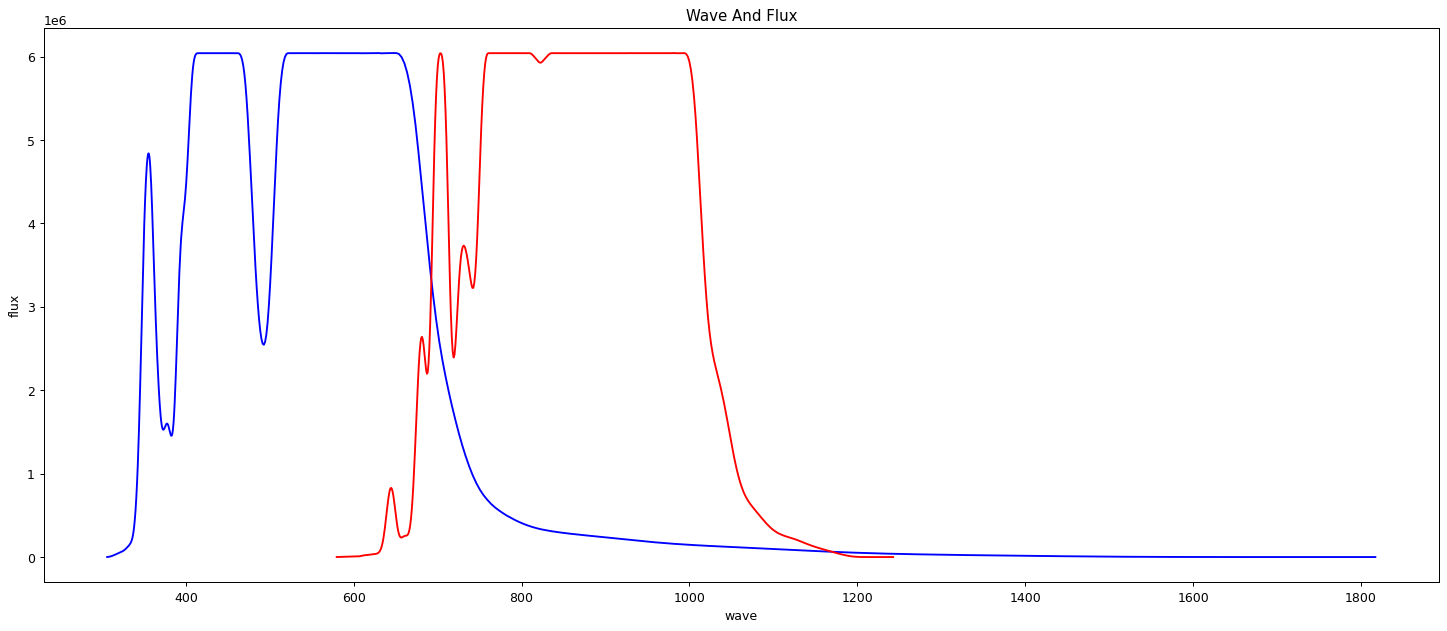

In [15]:
fig, ax = plt.subplots(figsize=(20, 8), dpi=90)
sns.lineplot(data=df_data_blue, x="wave", y="flux", errorbar=None,  color="blue")
sns.lineplot(data=df_data_red, x="wave", y="flux", errorbar=None,  color="red")
plt.title('Wave And Flux')

Text(0.5, 1.0, 'BP Y RP')

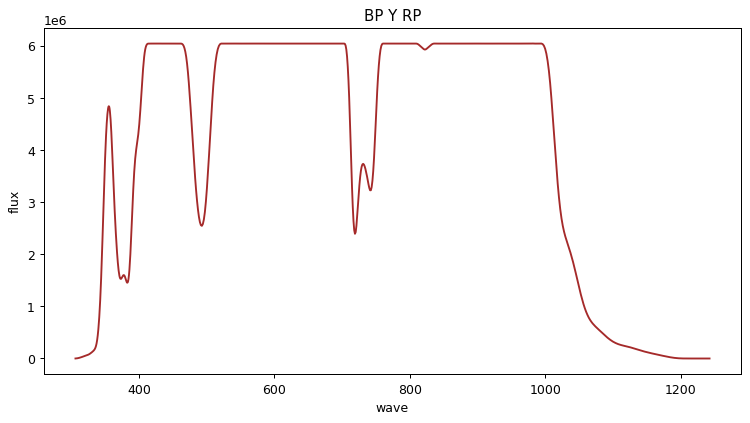

In [9]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=90)
sns.lineplot(data=df, x="wave", y="flux", errorbar=None,  color="brown")
plt.title('BP Y RP')